In [1]:
import Topic_modeling
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"]=20,20

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
everything = Topic_modeling.Topic_modeling('Excels/everything.xls', 'everything')
data_lemmatized = everything.data_lemmatized

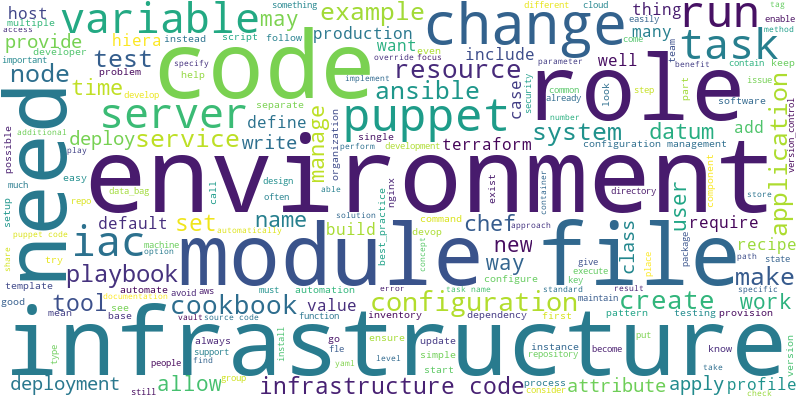

In [4]:
# Join the different processed texts together.
long_string = ','.join([','.join(text) for text in data_lemmatized])

#the string profle appears a lot and it is wrong, let's change it
long_string = long_string.replace('profle','profile')

# Create a WordCloud object
stopwords = set(STOPWORDS)
stopwords.add("use")

wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', stopwords=stopwords,width=800, height=400)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
from collections import Counter
wordcount = Counter(long_string.split(','))
sorted_wordcount = sorted(list(wordcount.items()), key=lambda x: x[1],reverse=True)
sorted_wordcount[:10]

[('puppet', 142),
 ('code', 129),
 ('use', 114),
 ('profile', 109),
 ('environment', 105),
 ('node', 89),
 ('infrastructure', 83),
 ('module', 71),
 ('role', 67),
 ('user', 63)]

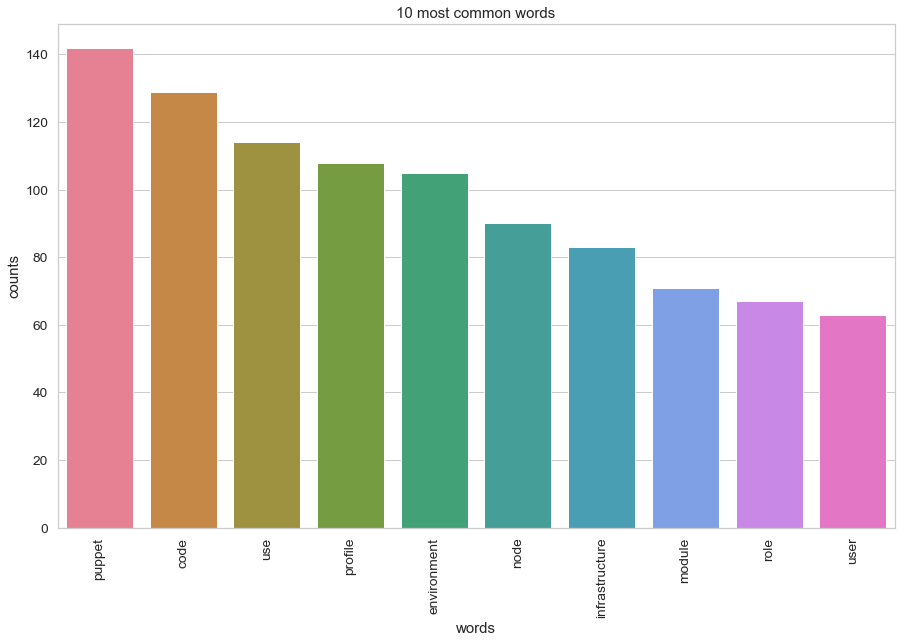

In [33]:
sns.set_style('whitegrid')

%matplotlib inline
# Helper function
def plot_10_most_common_words(data):
    import matplotlib.pyplot as plt
    words = [w[0] for w in data[0:10]]
    counts = [w[1] for w in data[0:10]]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Visualise the 10 most common words
plot_10_most_common_words(sorted_wordcount)